In [3]:
import numpy as np
import pylab as pl
import scipy as sp


#trial 2 change: f 0.1 -> 0.9
#trial 3 change>: f 0.1 -> 0.5
#trial 4 change: mean_false 201 -> 120
#trial 5 change: stdev_false 2 -> 20
mean_real = 200
mean_false = 201
stdev_real = 2
stdev_false = 2
f = 0.1

# graphing probabilities
# def introduces a method
def rho_real(o,mean,stddev):
	return np.exp(-(o-mean)**2/(2*stddev**2))/np.sqrt(2*np.pi*stddev**2)
def rho_false(o,mean,stddev):
    return np.exp(-(o-mean)**2/(2*stddev**2))/np.sqrt(2*np.pi*stddev**2)

def generate_environment(T=1000,f=f,vector_size = 120):
    # 1. Randomly decide if we are hallucinating or not
    # 2. If hallucinating, draw an observation from a normal distribution specified by rho_false
    # 3. If not, draw an observation from a normal distribution specified by rho_real
    # 4. add this observation to the list of observations.
    observations = []

    # choose if we are hallucinating or not
    u = np.random.binomial(n=1,p=f,size=T)
    #print(type(u))
    for t in range(T):
        vector = []
        # do an if statement to "case it out"
        if u[t]==0:
            # draw from real()
            for v in range(vector_size):
                o = np.random.normal(mean_real,stdev_real)
                vector.append(o)
        else:
            # draw from false
            for v in range(vector_size):
                o = np.random.normal(mean_false,stdev_false)
                vector.append(o)
        observations.append(vector)
    return observations, u

observations, u = generate_environment()

In [4]:
#slightly wrong priors
pr = 0.1

#slightly wrong likelihoods
mean_r_wrong = 200
mean_f_wrong = 201
stdev_r_wrong = 2
stdev_f_wrong = 2


def classify(observations):
    #define observations
    o = observations
    results = np.zeros(0, dtype = np.bool)

    #calculating L; L starts as ratio of priors, then ratio of likelihoods for each vector component
    for v in o:
        
        #perfect priors
        L = (1-f)/f
        
        #slightly wrong priors
        #L = (1-pr)/pr


        for vt in v:
            
            #perfect likelihoods
            #L *= rho_real(np.asarray(vt),mean_real,stdev_real)/rho_false(np.asarray(vt),mean_false,stdev_false)

            #slightly wrong likelihoods
            L *= rho_real(np.asarray(vt),mean_r_wrong,stdev_real)/rho_false(np.asarray(vt),mean_f_wrong,stdev_false)
        
        results = np.append(results,L>1)

    return results

 

In [5]:
from sklearn.metrics import accuracy_score
def _acc_rate(y_true, y_pred):
        #accuracy_score(y_true, y_pred) this method takes observations for y_true, classificatons for y_pred
        foo = accuracy_score(y_true, y_pred, normalize=False)
        return 100-(100*foo/1000)

[Text(0.5, 0, 'Vector Size'), Text(0, 0.5, 'Accuracy Rate')]

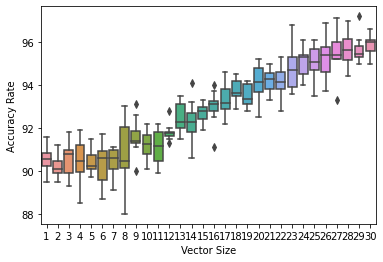

In [7]:
import pandas as pd
import seaborn as sb

data = pd.DataFrame()

max_vector_size = 30
trials_per_size = 10
for t in np.arange(max_vector_size):
    for i in np.arange(trials_per_size):
        obs, y_t = generate_environment(T = 1000, vector_size = t+1)
        data = data.append({t+1: _acc_rate(y_t, classify(obs))}, ignore_index=True)

axes = sb.boxplot(data=data)
axes.set(xlabel='Vector Size', ylabel='Accuracy Rate')